In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import qiskit as q

# Two qbits
https://www.youtube.com/watch?v=yGzmA98D0eU


In [2]:
# here we use a quantum computer simulator - with no access to underlying vectors
# init quantum computer simulator
simulator = q.Aer.get_backend('qasm_simulator')

In [3]:
# init circuit
circuit = q.QuantumCircuit(2,2) #qbits, classic measure bits

# build circuit
circuit.h(0) #Hadamard line 0
circuit.x(0) #Pauly X (invert |0> and |1> )
circuit.cx(0,1) #CNOT 0-1
circuit.h(1) #Hadamard line 1
#  add measure of qbit line 0 & 1 to classic lines 0 & 1 - to enable counts
circuit.measure([0,1],[0,1])

Figure(621.739x284.278)


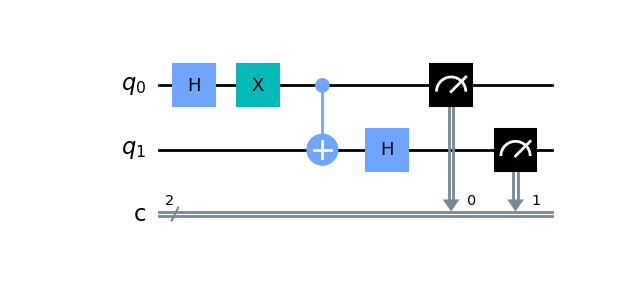

In [4]:
# display circuit in mpl
print(circuit.draw('mpl'))

Counts:{'01': 238, '10': 245, '00': 258, '11': 259}


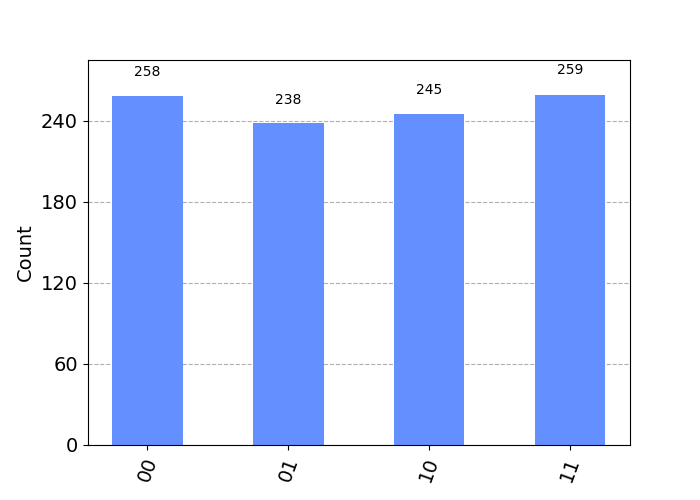

In [5]:
# run circuit on simulator
job = q.execute(circuit, simulator, shots=1000)

# wait for results
result = job.result()

# count measures
counts = result.get_counts(circuit)
print(f"Counts:{counts}")

# display results
q.visualization.plot_histogram(counts)
plt.show()

__NOTE__ : In qiskit, the output notation is right to left (the qbit of the first line is on the right)

In [6]:
# DEMO:
simulator = q.Aer.get_backend('qasm_simulator')
circuit = q.QuantumCircuit(2,2) #qbits, classic measure bits
circuit.x(0) #Set line 0 to |1>
circuit.measure_all()
print(circuit.draw())
job = q.execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print(f"Counts:{counts}")

        ┌───┐ ░ ┌─┐   
   q_0: ┤ X ├─░─┤M├───
        └───┘ ░ └╥┘┌─┐
   q_1: ──────░──╫─┤M├
              ░  ║ └╥┘
   c: 2/═════════╬══╬═
                 ║  ║ 
meas: 2/═════════╩══╩═
                 0  1 
Counts:{'01 00': 1000}
